In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

### This line of inquiry will explore the relationship between countries and their actions since the invasion.

In [2]:
country_data = pd.read_csv('../data/companies.csv')
country_data.head()

,Name,Action,Industry,Country,Grade
0,Agrana,continue operating plant in Russia,Consumer Staples,Austria,F
1,Agricultural Bank of China,Russian companies open accounts with the bank;...,Financials,China,F
2,Air China,still flying to Russia,Industrials,China,F
3,Air Serbia,still flying to Russia,Industrials,Serbia,F
4,Alibaba,still operating in Russia,Consumer Discretionary,China,F


In [3]:
country_counts = country_data['Country'].value_counts()
total_companies = len(country_data)

country_percentages = country_counts / total_companies * 100
print(round(country_percentages, 2))

United States     28.91
Germany            9.30
United Kingdom     8.10
France             5.25
Japan              4.81
                  ...  
Uzbekistan         0.06
Qatar              0.06
Egypt              0.06
Syria              0.06
Panama             0.06
Name: Country, Length: 67, dtype: float64


In [8]:
round(country_percentages.head(10), 2)

United States     28.91
Germany            9.30
United Kingdom     8.10
France             5.25
Japan              4.81
Switzerland        3.67
Finland            3.48
China              3.29
Netherlands        3.16
Poland             2.59
Name: Country, dtype: float64

In [39]:
country_counts = country_data['Country'].value_counts()

country_counts.head(10)

United States     457
Germany           147
United Kingdom    128
France             83
Japan              76
Switzerland        58
Finland            55
China              52
Netherlands        50
Poland             41
Name: Country, dtype: int64

In [17]:
top_countries = country_counts.head(10).index.tolist()

focused_data = country_data[country_data['Country'].isin(top_countries)]

#Limits data by companies that are listed in the top 10 countries by number.

print(focused_data.head(30))

                                         Name  \
1                  Agricultural Bank of China   
2                                   Air China   
4                                     Alibaba   
5                            Align Technology   
9                                   ANT Group   
10                                Anta Sports   
11                                      Antal   
12                           AnyDesk Software   
14                              Auchan-Retail   
15                     AUMA Riester GmbH & Co   
16                                   B. Braun   
17                                    Babolat   
23                                  Bonduelle   
24                                        BPW   
25                                     Bruker   
26                                   BT Group   
29                             Camille Albane   
30                           Carl's Jr. | CLK   
32                                  ChampionX   
35  China Communicat

In [16]:
#Recalculate Data to show percentages of total with only the top 10 countries by number of companies in Russia
top_10_countries = focused_data['Country'].value_counts()
top_countries_percentage = top_10_countries / len(country_data) * 100

print(round(top_countries_percentage, 2))

United States     28.91
Germany            9.30
United Kingdom     8.10
France             5.25
Japan              4.81
Switzerland        3.67
Finland            3.48
China              3.29
Netherlands        3.16
Poland             2.59
Name: Country, dtype: float64


Text(0, 0.5, 'Percentage of Total')

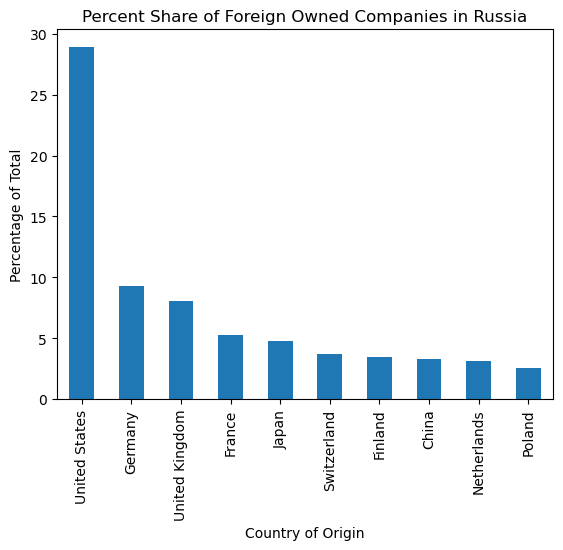

In [19]:
top_countries_percentage.plot(kind='bar')

plt. title('Percent Share of Foreign Owned Companies in Russia')
plt.xlabel('Country of Origin')
plt.ylabel('Percentage of Total')

In [20]:
country_grades = country_data.groupby('Country')['Grade'].value_counts()
print(country_grades)

Country        Grade
Andorra        D         2
Australia      A         8
               B         3
               D         1
Austria        F         9
                        ..
United States  C        55
               D        47
               F        27
Uzbekistan     F         1
Vietnam        B         1
Name: Grade, Length: 186, dtype: int64


In [21]:
# Grade A by percentage of the total in the 10 biggest countries.
# This is a percentage of the total of all companies in Russia.

grade_A_count = focused_data[focused_data['Grade'] == 'A'].groupby('Country')['Grade'].count()

country_percent_A = grade_A_count / len(focused_data) * 100

country_percent_A_sorted = country_percent_A.sort_values(ascending=False)

print(round(country_percent_A_sorted, 2))

Country
United States     14.30
United Kingdom     5.84
Germany            3.75
Finland            2.88
Switzerland        1.83
Poland             1.74
France             1.66
Netherlands        1.48
Japan              0.96
China              0.09
Name: Grade, dtype: float64


In [33]:
#This shows as a percentage of that country's companies.  This configuration also sets the "custom_order" line of code.

grade_A_count = focused_data[focused_data['Grade'] == 'A'].groupby('Country')['Grade'].count()
country_counts = focused_data['Country'].value_counts()

custom_order = ['Finland', 'United Kingdom', 'Poland', 'Switzerland', 'United States', 'Netherlands', 'Germany', 'France', 'Japan', 'China']

country_percent_A = grade_A_count / country_counts * 100
country_percent_A_sorted = country_percent_A.sort_values(key=lambda x: x.index.map(lambda y: custom_order.index(y)), ascending=True)

print(round(country_percent_A_sorted, 2))

Finland           60.00
United Kingdom    52.34
Poland            48.78
Switzerland       36.21
United States     35.89
Netherlands       34.00
Germany           29.25
France            22.89
Japan             14.47
China              1.92
dtype: float64


(0.0, 80.0)

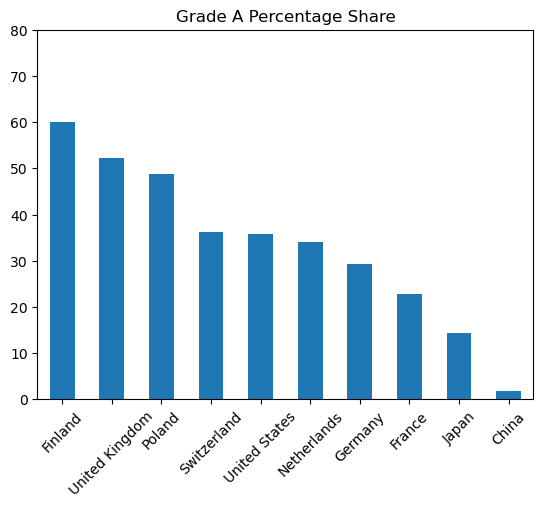

In [34]:
country_percent_A_sorted.plot(kind='bar')

plt.title('Grade A Percentage Share')
plt.xlabel(None)
plt.ylabel(None)

plt.xticks(rotation=45)

plt.ylim([0, 80])

In [37]:
#This shows as a percentage of that country's companies by C Grade.

grade_C_count = focused_data[focused_data['Grade'] == 'C'].groupby('Country')['Grade'].count()
country_counts = focused_data['Country'].value_counts()

custom_order = ['Finland', 'United Kingdom', 'Poland', 'Switzerland', 'United States', 'Netherlands', 'Germany', 'France', 'Japan', 'China']

country_percent_C = grade_C_count / country_counts * 100
country_percent_C_sorted = country_percent_C.sort_values(key=lambda x: x.index.map(lambda y: custom_order.index(y)), ascending=True)

print(round(country_percent_C_sorted, 2))

Finland            3.64
United Kingdom     3.12
Poland             9.76
Switzerland       17.24
United States     12.04
Netherlands       16.00
Germany           12.93
France             6.02
Japan              6.58
China              1.92
dtype: float64


(0.0, 80.0)

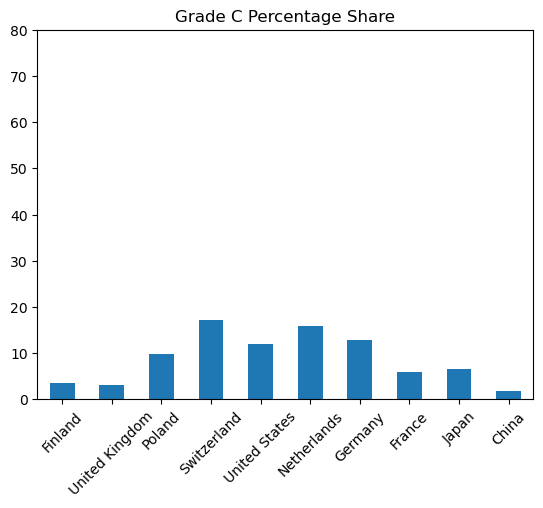

In [38]:
country_percent_C_sorted.plot(kind='bar')

plt.title('Grade C Percentage Share')
plt.xlabel(None)
plt.ylabel(None)

plt.xticks(rotation=45)

plt.ylim([0, 80])

In [35]:
#This shows as a percentage of that country's companies.

grade_F_count = focused_data[focused_data['Grade'] == 'F'].groupby('Country')['Grade'].count()
country_counts = focused_data['Country'].value_counts()

custom_order = ['Finland', 'United Kingdom', 'Poland', 'Switzerland', 'United States', 'Netherlands', 'Germany', 'France', 'Japan', 'China']

country_percent_F = grade_F_count / country_counts * 100
country_percent_F_sorted = country_percent_F.sort_values(key=lambda x: x.index.map(lambda y: custom_order.index(y)), ascending=True)

print(round(country_percent_F_sorted, 2))

Finland             NaN
United Kingdom     5.47
Poland             2.44
Switzerland        6.90
United States      5.91
Netherlands         NaN
Germany           18.37
France            31.33
Japan             17.11
China             78.85
dtype: float64


(0.0, 80.0)

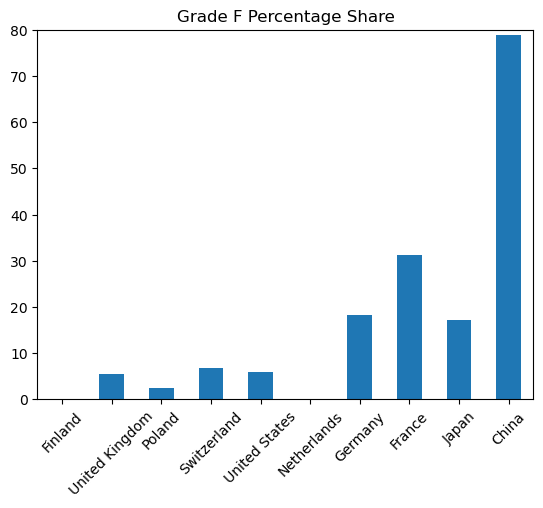

In [36]:
country_percent_F_sorted.plot(kind='bar')

plt.title('Grade F Percentage Share')
plt.xlabel(None)
plt.ylabel(None)

plt.xticks(rotation=45)

plt.ylim([0, 80])

#### This equates to 26 French Companies, 41 Chinese Companies, 27 US Companies.